<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/101_Autoencoder_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AUTOENCODER EXERCICE

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [64]:
df = pd.read_csv('UK_foods.csv', index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
England      17 non-null int64
Wales        17 non-null int64
Scotland     17 non-null int64
N.Ireland    17 non-null int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [65]:
df = df.transpose()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, England to N.Ireland
Data columns (total 17 columns):
Cheese                 4 non-null int64
Carcass_meat           4 non-null int64
Other_meat             4 non-null int64
Fish                   4 non-null int64
Fats_and_oils          4 non-null int64
Sugars                 4 non-null int64
Fresh_potatoes         4 non-null int64
Fresh_Veg              4 non-null int64
Other_Veg              4 non-null int64
Processed_potatoes     4 non-null int64
Processed_Veg          4 non-null int64
Fresh_fruit            4 non-null int64
Cereals                4 non-null int64
Beverages              4 non-null int64
Soft_drinks            4 non-null int64
Alcoholic_drinks       4 non-null int64
Confectionery          4 non-null int64
dtypes: int64(17)
memory usage: 736.0+ bytes


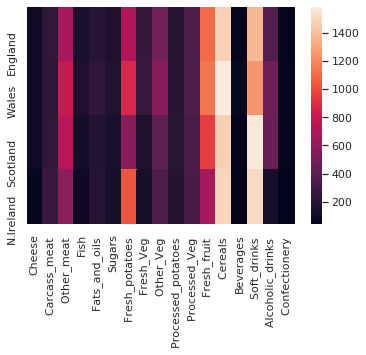

In [66]:
sns.heatmap(df)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [0]:
input_shape = 17

In [0]:
encoder = Sequential()
encoder.add(Dense(8, activation='relu', input_shape=[input_shape]))
encoder.add(Dense(4, activation='relu'))
encoder.add(Dense(2, activation='relu'))

In [0]:
decoder = Sequential()
decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu'))
decoder.add(Dense(17, activation='relu'))

In [0]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=0.5))

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()

In [0]:
scaled_df = sc.fit_transform(df)

In [75]:
autoencoder.fit(scaled_df, scaled_df, epochs=10)

Train on 4 samples
Epoch 1/10
4/4 [==============================] - 0s 69ms/sample - loss: 0.4152
Epoch 2/10
4/4 [==============================] - 0s 801us/sample - loss: 0.3850
Epoch 3/10
4/4 [==============================] - 0s 891us/sample - loss: 0.3617
Epoch 4/10
4/4 [==============================] - 0s 1ms/sample - loss: 0.3436
Epoch 5/10
4/4 [==============================] - 0s 1ms/sample - loss: 0.3294
Epoch 6/10
4/4 [==============================] - 0s 878us/sample - loss: 0.3187
Epoch 7/10
4/4 [==============================] - 0s 884us/sample - loss: 0.3105
Epoch 8/10
4/4 [==============================] - 0s 1ms/sample - loss: 0.3043
Epoch 9/10
4/4 [==============================] - 0s 1ms/sample - loss: 0.2999
Epoch 10/10
4/4 [==============================] - 0s 754us/sample - loss: 0.2967


In [0]:
encoded_2dim = encoder.predict(scaled_df)

In [77]:
encoded_2dim

array([[0.        , 0.9606956 ],
       [0.        , 1.7607675 ],
       [0.10632657, 1.0254604 ],
       [0.29194772, 0.5587102 ]], dtype=float32)

In [78]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [0]:
res = pd.DataFrame(data=encoded_2dim, index=df.index, columns=['C1', 'C2'])
res = res.reset_index()

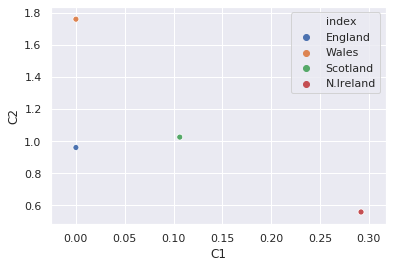

In [80]:
sns.scatterplot(x='C1', y='C2', data=res, hue='index')

In [47]:
res

,C1,C2
England,0.0,1.581454
Wales,0.0,1.884609
Scotland,0.0,1.012344
N.Ireland,0.0,1.099530
